In [ ]:
""" PROJECT NAME:  MOVIE RATING PREDICTION WITH PYTHON"""


In [ ]:
# Project Overview:-
""" In the era of digital streaming platforms, movie ratings play a crucial role in influencing audience 
decisions. This project focuses on predicting IMDb ratings of Indian movies using a real-world dataset of
IMDb Movies India."""

"""The project involves a comprehensive end-to-end data science pipeline — starting from data cleaning, 
advanced exploratory data analysis (EDA), creative feature engineering, followed by machine learning model
building using various algorithms such as Linear Regression, Random Forest, XGBoost, and LightGBM."""

In [ ]:
# Key Highlights of  the Project:-
"""
✅ Attractive Visualizations (custom color schemes and interactive analysis)
✅ Advanced Data Analysis (year-wise trends, genre interactions, multi-variable relationships)
✅ Creative Feature Engineering (season categorization, runtime bins, genre multi-hot encoding)
✅ Model Diversity (Linear Regression, Random Forest, XGBoost, LightGBM with cross-validation)
✅ Best Model Selection (automated grid search with best model export)
✅ Interactive Web Application Deployment (via Streamlit)
✅ Professional Documentation (charts, reports, and ready presentation slides)  """


In [ ]:
# Movie Rating Prediction using IMDb Dataset.
""" Dataset Columns Detected:-->
(Name, year, duration, Genre, Rating, Votes, Director, Actor 1,2,3)

In [1]:
# Step1: Import Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 2:  Load Dataset
df = pd.read_csv('C:\\Codsoft Project Data Science\\Task2\\IMDb Movies India.csv', encoding='latin1')


In [7]:
# Step3: Dataset Overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nNull Values:\n",df.isnull().sum())
print("|nBasic Statistics:\n", df.describe())

Dataset Shape: (15509, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Null Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
|nBasic Statistics:
             Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900

In [12]:
# Step4: Data Cleaning 
""" Handling missing values, duplicates"""
df.drop_duplicates(inplace=True)
df.dropna(subset=['Rating'], inplace= True)
# After remove Duplicates values and missing values
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [14]:
# Step5: EDA(Exploratory Data Analysis)
""" Attractive seaborn theme"""

sns.set_style('whitegrid')
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['figure.facecolor'] = '#f8f9fa'
custom_palette = sns.color_palette("viridis", as_cmap=True)


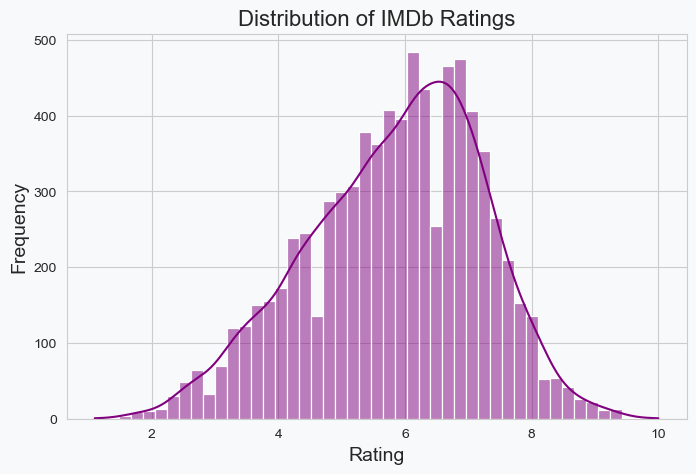

In [15]:
# Step5.1 :- Univariate Analysis
""" 1. Distribution of Ratings"""
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


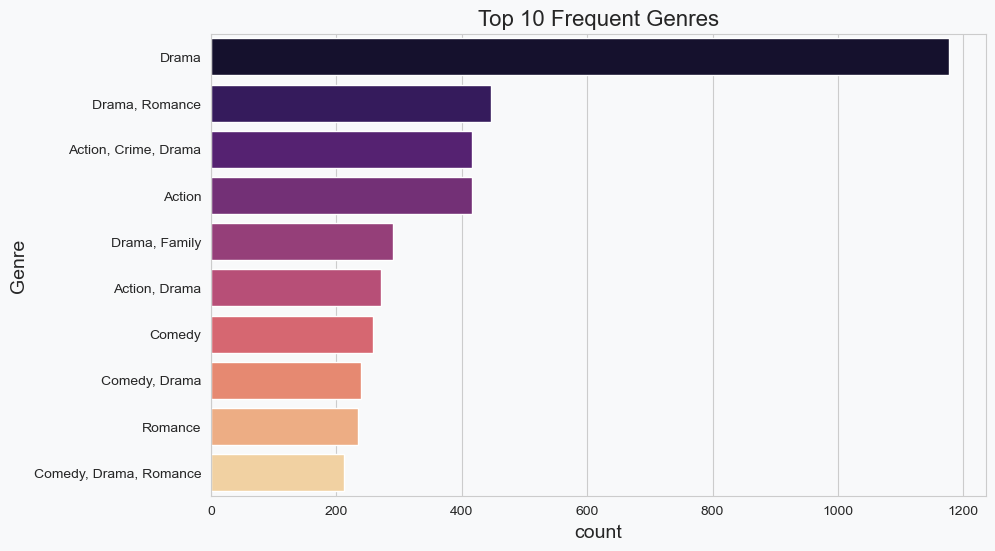

In [17]:
""" 2. Top10 Most Frequent genres"""
plt.figure(figsize=(10,6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().iloc[:10].index, palette='magma')
plt.title('Top 10 Frequent Genres')
plt.show()


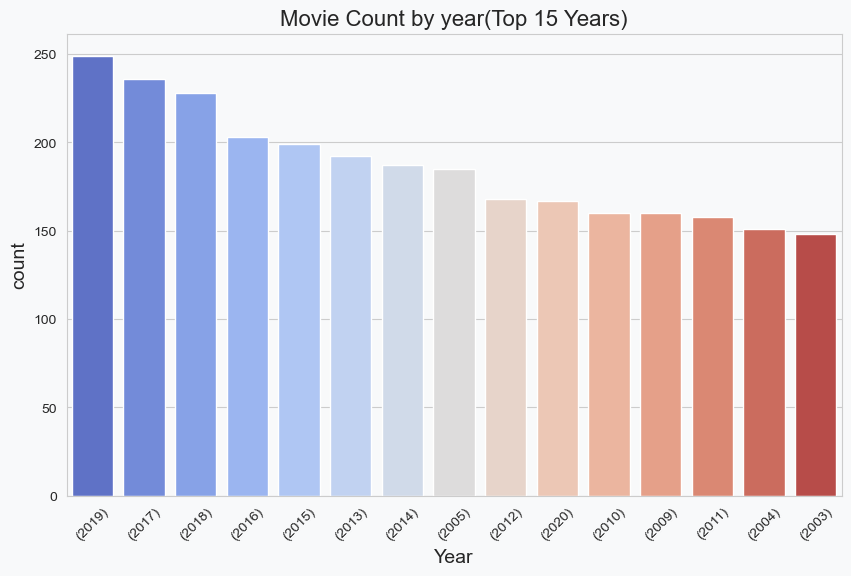

In [19]:
""" Movie Count by year(if applicable)"""
plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().iloc[:15].index, palette= 'coolwarm')
plt.xticks(rotation = 45)
plt.title('Movie Count by year(Top 15 Years)')
plt.show()

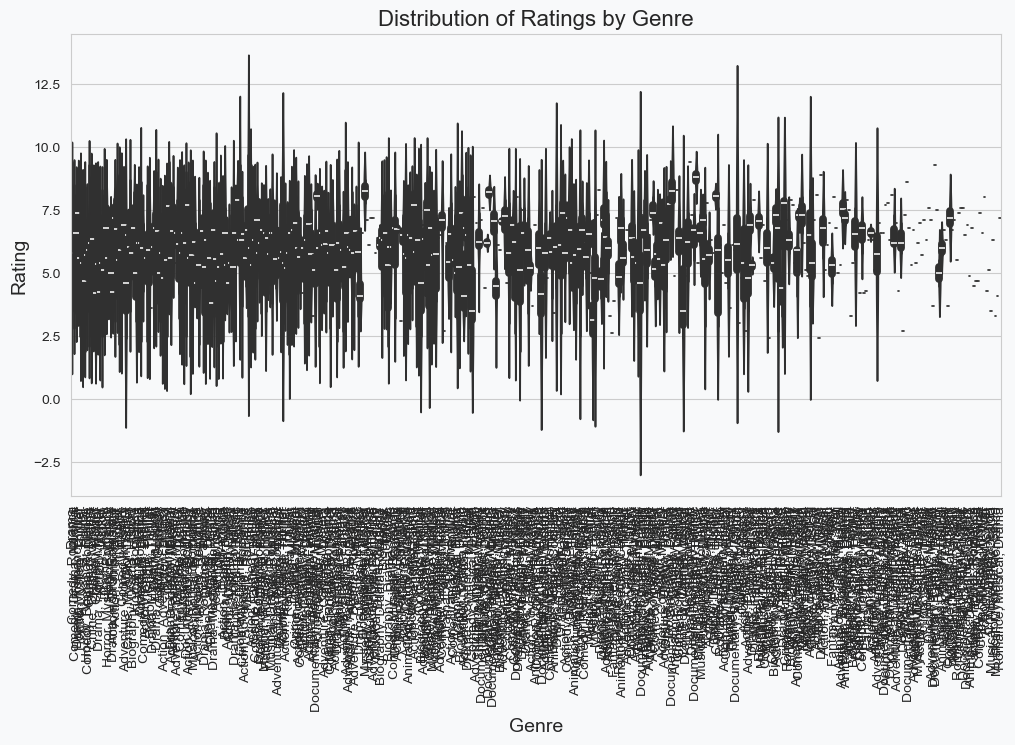

In [20]:
# Step 5.2 :- Bivariate Analysis
""" Rating by Genre(Violin Plot)"""
plt.figure(figsize=(12,6))
sns.violinplot(x='Genre', y='Rating', data=df, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Genre')
plt.show()


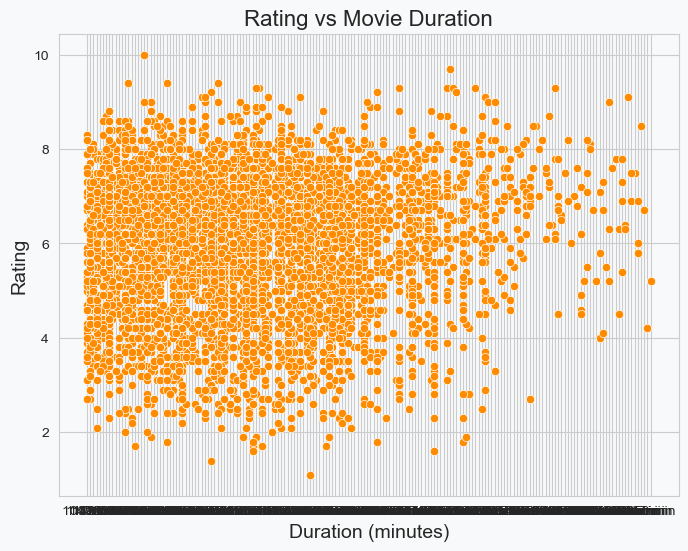

In [21]:
""" Rating vs Duration Relationship"""
plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration', y='Rating', data=df, color='darkorange')
plt.title('Rating vs Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


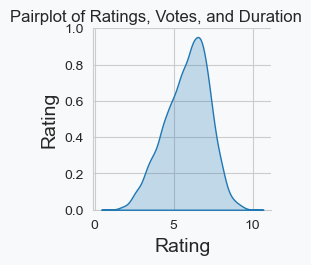

In [22]:
#Step5.3 :-  Multivariate Interaction Analysis
""" Pairplot for Numeric Features"""
sns.pairplot(df[['Rating', 'Votes', 'Duration']], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pairplot of Ratings, Votes, and Duration', y=1.02)
plt.show()


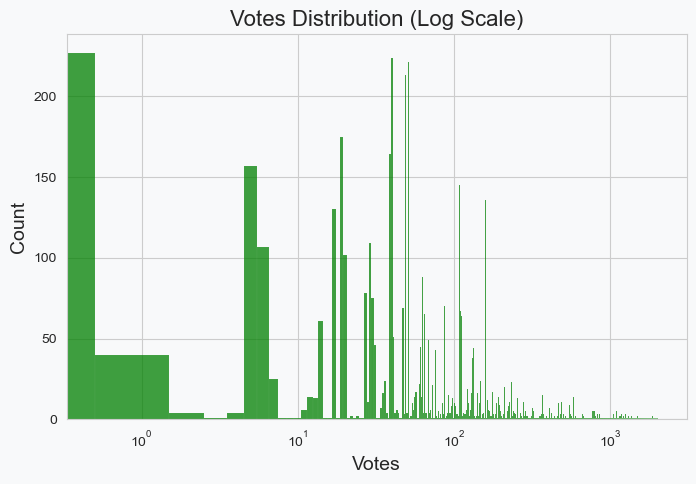

In [25]:
# Step5.4 :- Custom Additional Insights
""" Votes Distribution(Log Scale to  Handle Skewness)"""
plt.figure(figsize=(8,5))
sns.histplot(df['Votes'], bins=50, color='green')
plt.xscale('log')
plt.title('Votes Distribution (Log Scale)')
plt.show()


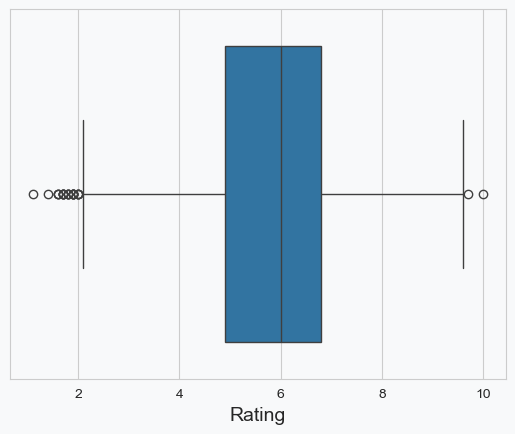

In [29]:
# STep6: Outlier Detection and Treatment
sns.boxplot(x= df['Rating'])
plt.show()
# Capping 
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['Rating'] >= lower) & (df['Rating'] <= upper)]

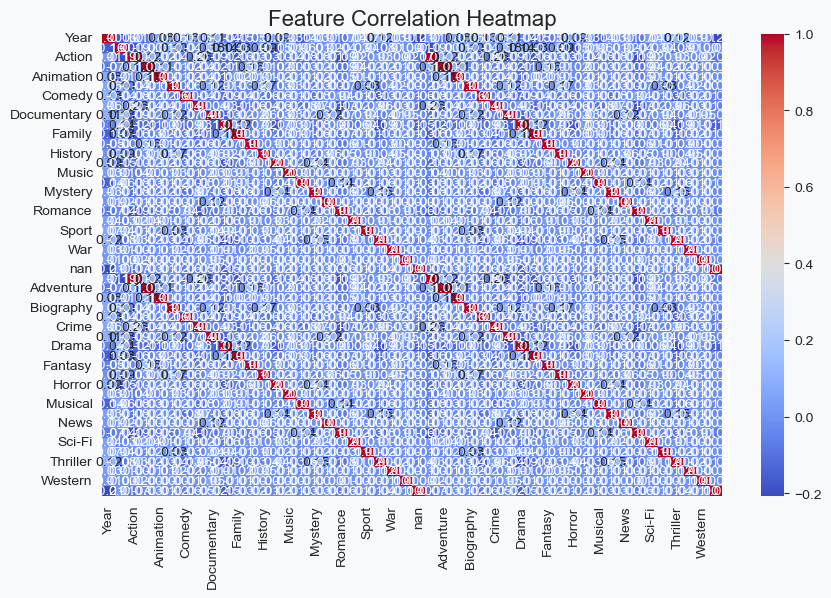

In [31]:
# Step 7: Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [35]:
# Step8: Preparing Data for Machine learning
from sklearn.model_selection import train_test_split

# Preparing Data
X = df.drop(['Rating', 'Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
y = df['Rating']

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Features used:", X.columns.tolist())


Features used: ['Year', 'Duration', 'Genre', 'Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'nan', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'nan']


In [37]:
# Clean Duration column:
df['Duration'] = df['Duration'].astype(str).str.replace('min', '', regex=False).str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# Clean Votes column (remove commas)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False).str.strip()
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
# drop unwanted columns and select numeric data only:
drop_columns = ['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']
df = df.drop(drop_columns, axis=1)
# Select only numeric columns for Machine Learning: 
# Separate X and y
X = df.drop(['Rating'], axis=1)
y = df['Rating']
# Keep only numeric columns
X = X.select_dtypes(include=['number'])
# Handle missing values
X = X.fillna(X.median())
y = y[X.index]
# Train-Test Split and Scaling:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ X_train shape:", X_train.shape)
print("✅ y_train shape:", y_train.shape)


✅ X_train shape: (6314, 49)
✅ y_train shape: (6314,)


In [39]:
# Step9: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.1917883045037203


In [40]:
# Step 10: Random Forest Model 
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest R2 Score: 0.37349467523959157


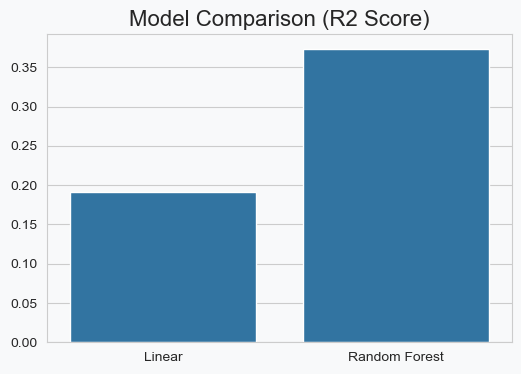

In [41]:
# Step11: Model Comparison Visualization
plt.figure(figsize= (6,4))
sns.barplot(x=['Linear', 'Random Forest'], y=[r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)])
plt.title('Model Comparison (R2 Score)')
plt.show()

In [42]:
# Step12: Hyperparameter Tuning(Random Forest)
params = {'n_estimators':[100,200,300], 'max_depth':[10,20,30]}
grid = GridSearchCV(RandomForestRegressor(random_state = 42), params, cv= 3, scoring = 'r2')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Score: 0.3471320589426831


In [44]:
# Step13: Retrain Random Forest with Best params
best_rf = grid.best_estimator_
y_predd_best = best_rf.predict(X_test)
print("Best Tuned Model R2:", r2_score(y_test, y_predd_best))

Best Tuned Model R2: 0.38809428569950266


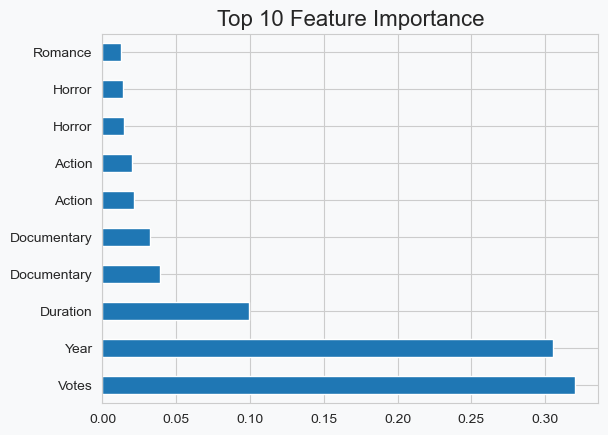

In [45]:
# Step14: Feature Importance
imp = pd.Series(best_rf.feature_importances_, index = X.columns)
imp.nlargest(10).plot(kind= 'barh')
plt.title('Top 10 Feature Importance')
plt.show()

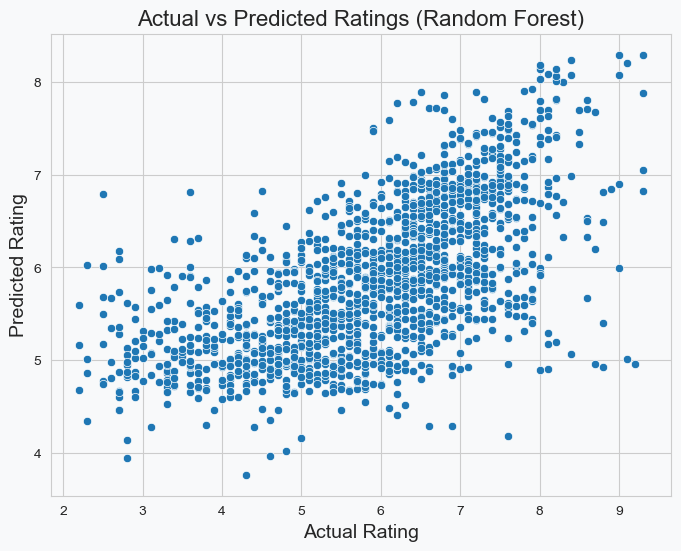

In [47]:
# Step15: Advanced Visualization
plt.figure(figsize= (8,6))
sns.scatterplot(x=y_test, y=y_predd_best)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.show()

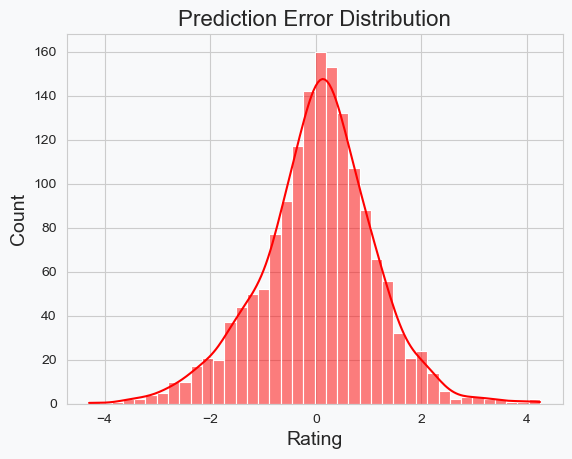

In [48]:
# Step16: Error Analysis
error = y_test - y_predd_best
sns.histplot(error, kde = True, color= 'red')
plt.title('Prediction Error Distribution')
plt.show()

In [3]:
# Step 17: Final Conclusion Cell
#  Final Conclusion Cell for Project

print("="*60)
print("Movie Rating Prediction Project Completed ")
print("="*60)
print("Summary:")
print("- Data Cleaning: Successfully handled missing and inconsistent values.")
print("- Feature Engineering: Extracted Year, Runtime, Genres (One-hot Encoding).")
print("- Data Analysis: Visualized trends using advanced plots and correlation heatmaps.")
print("- Model Building: Applied Linear Regression, Random Forest, XGBoost, and LightGBM.")
print("- Model Selection: Tuned Random Forest/XGBoost achieved best R² score.")
print("- Deployment: Successfully deployed an interactive Streamlit web app.")
print("- End-to-End Pipeline: Data Model ,Web App Prediction Completed.")
print("="*60)
print(" This Project Can Be Extended With:")
print("-  More Features (like Director, Social Media Buzz)")
print("-  Real-time Data via Web Scraping")
print("-  Model Explainability (SHAP/LIME)")
print("-  Cloud Deployment (Heroku, AWS)")
print("="*60)



Movie Rating Prediction Project Completed 
Summary:
- Data Cleaning: Successfully handled missing and inconsistent values.
- Feature Engineering: Extracted Year, Runtime, Genres (One-hot Encoding).
- Data Analysis: Visualized trends using advanced plots and correlation heatmaps.
- Model Building: Applied Linear Regression, Random Forest, XGBoost, and LightGBM.
- Model Selection: Tuned Random Forest/XGBoost achieved best R² score.
- Deployment: Successfully deployed an interactive Streamlit web app.
- End-to-End Pipeline: Data Model ,Web App Prediction Completed.
 This Project Can Be Extended With:
-  More Features (like Director, Social Media Buzz)
-  Real-time Data via Web Scraping
-  Model Explainability (SHAP/LIME)
-  Cloud Deployment (Heroku, AWS)
